In [2]:
import numpy as np
from PIL import Image

In [3]:
def checkImage(shape):
    if len(shape) == 3:
        return True
    
    if len(shape) == 1:
        print("\033[91m Provided Image already a gray scale image.")

    if len(shape) != 1:
        print("\033[91m Provided image is not supported.")

    return False

# <center>__Average Method__</center>
### <center>average value of the components (<span style="color:red">red</span>, <span style="color:green">green</span>, <span style="color:blue">blue</span>) as grayscale value grayscale :</center>
### $$ grayscale= \frac{R + G + B}{3} $$


In [23]:
def averageMethod(img_mat):
    new_mat = np.empty((img_mat.shape[0], img_mat.shape[1]), dtype=np.uint8)

    for i in range(img_mat.shape[0]):
        for j in range(img_mat.shape[1]):
            sum = 0
            for k in range(img_mat.shape[2]):
                sum += img_mat[i][j][k]

            sum /= 3
            new_mat[i][j] = sum

    return new_mat

# <center>__Lightness Method__</center>
## average value of the components with the highest and lowet value :

### $$ grayscale= \frac{min(R,G,B) + max(R,G,B)}{2} $$


In [29]:
def lightnessMethod(img_mat):
    new_mat = np.empty((img_mat.shape[0], img_mat.shape[1]), dtype=np.uint8)

    for i in range(img_mat.shape[0]):
        for j in range(img_mat.shape[1]):
            mx = mi = img_mat[i][j][0]
            for k in range(1, img_mat.shape[2]):
                mi = min(mi, img_mat[i][j][k])
                mx = max(mx, img_mat[i][j][k])

            sum = int(mi) + mx
            new_mat[i][j] = sum / 2

    return new_mat

# <center>__Luminosity Method__</center>
### $$ grayscale= 0.3 * R + 0.59 * G + 0.11 * B $$


In [33]:
def luminosityMethod(img_mat):
    new_mat = np.empty((img_mat.shape[0], img_mat.shape[1]), dtype=np.uint8)

    for i in range(img_mat.shape[0]):
        for j in range(img_mat.shape[1]):
            res = 0;
            for k in range(1, img_mat.shape[2]):
                multiplier = 0.3
                if k == 1:
                    multiplier = 0.59
                elif k == 2:
                    multiplier = 0.11
                res += multiplier * img_mat[i][j][k]
                
            new_mat[i][j] = res

    return new_mat

In [39]:
def convertToGray1(path:str):
    img = Image.open(path)
    img_mat = np.array(img)
    new_img_mat = averageMethod(img_mat)

    return Image.fromarray(new_img_mat)

In [40]:
def convertToGray2(path:str):
    img = Image.open(path)
    img_mat = np.array(img)
    new_img_mat = lightnessMethod(img_mat)

    return Image.fromarray(new_img_mat)

In [41]:
def convertToGray3(path:str):
    img = Image.open(path)
    img_mat = np.array(img)
    new_img_mat = luminosityMethod(img_mat)

    return Image.fromarray(new_img_mat)

In [48]:
def showConvertedImage(path:str):
    img = Image.open(path)
    
    pil_gray_img = img.convert("L")
    gray_img1 = convertToGray1(path)
    gray_img2 = convertToGray2(path)
    gray_img3 = convertToGray3(path)
    
    import matplotlib.pyplot as plt
    fg, axs = plt.subplots(1, 5, figsize=(20, 20))
    axs[0].imshow(img)
    axs[0].axis("off")
    axs[0].set_title("RGB")
    
    axs[1].imshow(pil_gray_img, cmap="gray")
    axs[1].axis("off")
    axs[1].set_title("PIL Gray")
    
    axs[2].imshow(gray_img1, cmap="gray")
    axs[2].axis("off")
    axs[2].set_title("Gray (Average Method)")
    
    axs[3].imshow(gray_img2, cmap="gray")
    axs[3].axis("off")
    axs[3].set_title("Gray (Lightness Method)")
    
    axs[4].imshow(gray_img3, cmap="gray")
    axs[4].axis("off")
    axs[4].set_title("Gray (Luminosity Method)")
    
    plt.show()

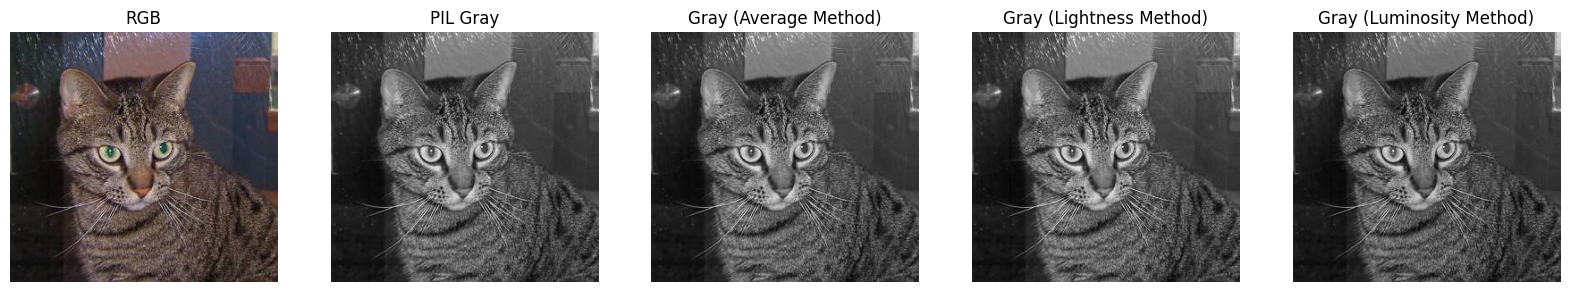

In [49]:
showConvertedImage("Images/1.jpg")

In [ ]:
showConvertedImage("Images/